In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pickle
from sklearn.metrics import mean_squared_error

In [2]:
#data = pd.read_csv(r"E:\CDAC\Project\Pune.csv")
#from google.colab import drive
#drive.mount('/content/drive')
# Load the file from Google Drive
#data = pd.read_csv("/content/drive/MyDrive/Datasets - Colab/Pune.csv")
data=pd.read_csv('/kaggle/input/temp-data/Chennai.csv')

In [3]:
#checking columns
data.columns

Index(['Date', 'PS', 'PSC', 'T2M', 'T2MWET', 'T2MDEW', 'WS2M', 'WD2M', 'WD10M',
       'WS10M', 'QV2M', 'RH2M', 'PRECTOTCORR', 'Latitude', 'Longitude'],
      dtype='object')

In [4]:
#dropping unrequired features
data=data.drop(['T2MDEW', 'T2MWET', 'PS', 'PSC', 'WS2M', 'Latitude', 'Longitude', 'QV2M', 'RH2M', 'PRECTOTCORR', 'WD2M', 'WD10M', 'WS10M'], axis=1)
data.head()

,Date,T2M
0,2004010109,26.67
1,2004010114,27.63
2,2004010406,21.37
3,2004010408,25.62
4,2004010410,27.43


In [5]:
# convert the date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d%H')
data.head()

,Date,T2M
0,2004-01-01 09:00:00,26.67
1,2004-01-01 14:00:00,27.63
2,2004-01-04 06:00:00,21.37
3,2004-01-04 08:00:00,25.62
4,2004-01-04 10:00:00,27.43


In [6]:
#changing index to date
data.index = data['Date']
data.head()

,Date,T2M
Date,,
2004-01-01 09:00:00,2004-01-01 09:00:00,26.67
2004-01-01 14:00:00,2004-01-01 14:00:00,27.63
2004-01-04 06:00:00,2004-01-04 06:00:00,21.37
2004-01-04 08:00:00,2004-01-04 08:00:00,25.62
2004-01-04 10:00:00,2004-01-04 10:00:00,27.43


In [7]:
data=data.sort_index()

In [8]:
data.head()

,Date,T2M
Date,,
2004-01-01 05:00:00,2004-01-01 05:00:00,22.12
2004-01-01 06:00:00,2004-01-01 06:00:00,22.73
2004-01-01 07:00:00,2004-01-01 07:00:00,24.27
2004-01-01 08:00:00,2004-01-01 08:00:00,25.66
2004-01-01 09:00:00,2004-01-01 09:00:00,26.67


In [9]:
#Renaming columns
data.rename(columns={'T2M': 'TEMP'}, inplace=True)

In [10]:
#checking for duplicated entried
data.duplicated().sum()

120

In [11]:
#dropping duplicate values
data=data.drop_duplicates()
data.duplicated().sum()

0

In [12]:
data.tail()

,Date,TEMP
Date,,
2024-02-19 00:00:00,2024-02-19 00:00:00,23.75
2024-02-19 01:00:00,2024-02-19 01:00:00,23.67
2024-02-19 02:00:00,2024-02-19 02:00:00,23.83
2024-02-19 03:00:00,2024-02-19 03:00:00,23.98
2024-02-19 04:00:00,2024-02-19 04:00:00,23.89


In [13]:
data=data[:-5]
data.tail()

,Date,TEMP
Date,,
2024-02-18 19:00:00,2024-02-18 19:00:00,25.73
2024-02-18 20:00:00,2024-02-18 20:00:00,25.13
2024-02-18 21:00:00,2024-02-18 21:00:00,24.60
2024-02-18 22:00:00,2024-02-18 22:00:00,24.23
2024-02-18 23:00:00,2024-02-18 23:00:00,23.96


In [14]:
data.count()

Date    176491
TEMP    176491
dtype: int64

In [15]:
# Splitting data into train and test sets
train_data = data[:8760]  # 1 year data
test_data = data[8760:8808]   # Use the last 48 hours for testing

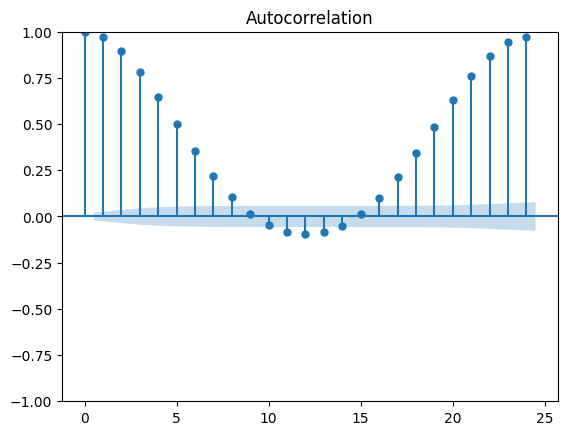

In [16]:
#plotting autocorrelation graph
plot_acf(train_data["TEMP"], lags=24, )
plt.show()

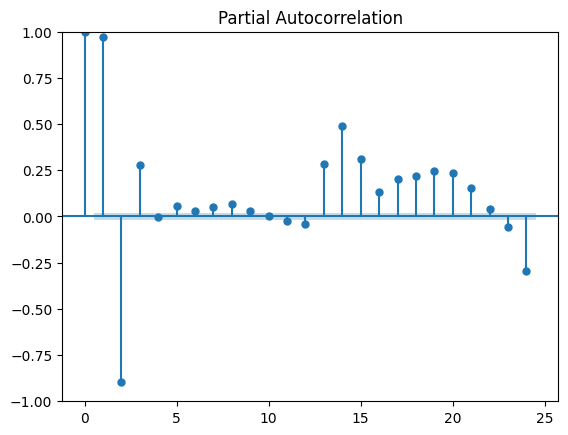

In [17]:
#plotting partial autocorrelation graph
plot_pacf(train_data["TEMP"], lags=24)
plt.show()

In [18]:
# SARIMA model parameters
order = (1, 1, 1)  # ARIMA parameters (p, d, q)
seasonal_order = (1, 1, 1, 24)  # SARIMA parameters (P, D, Q, S)

In [19]:
#to store RMSE after every year
rmse_record={}

In [21]:
# Fit SARIMA model
chennai_model = SARIMAX(train_data["TEMP"], order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False, dates=train_data["Date"])
chennai_result = chennai_model.fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.92976D-01    |proj g|=  1.06509D+00


 This problem is unconstrained.



At iterate    5    f= -5.07290D-01    |proj g|=  6.03903D-01

At iterate   10    f= -5.34959D-01    |proj g|=  6.86628D-01

At iterate   15    f= -5.48517D-01    |proj g|=  8.04287D-02

At iterate   20    f= -5.49306D-01    |proj g|=  7.14408D-03

At iterate   25    f= -5.49323D-01    |proj g|=  2.45706D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     33      1     0     0   2.457D-06  -5.493D-01
  F = -0.54932273008333932     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [25]:
# Forecast temperatures for the next 48 hours
forecast = chennai_result.get_forecast(steps=48)

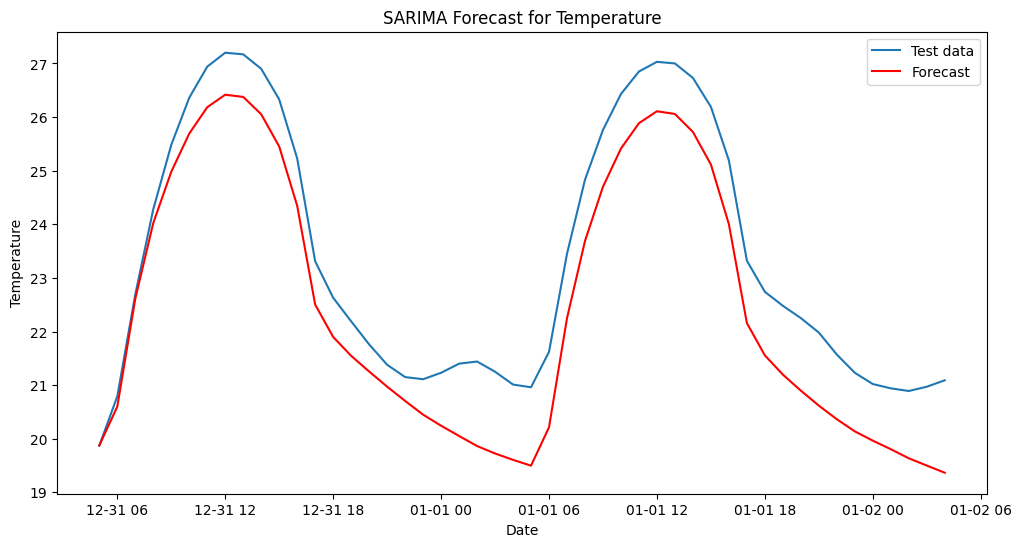

In [26]:
# Plot the predicted values along with the actual values
plt.figure(figsize=(12, 6))
#plt.plot(check.index, check["TEMP"], label='Train data')
plt.plot(test_data.index, test_data["TEMP"], label='Test data')
plt.plot(forecast.predicted_mean, label='Forecast', color='red')
#plt.plot(forecast.index, forecast.predicted_mean, label='Forecast', color='red')
#plt.fill_between(forecast.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.5)
plt.title('SARIMA Forecast for Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [27]:
rmse = np.sqrt(mean_squared_error(test_data["TEMP"], forecast.predicted_mean))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 1.0435281520809399


In [28]:
rmse_record[1]=rmse

In [29]:
#saving pickle file of model
#with open("/kaggle/working/agartala_model.pkl", 'wb') as f:
#    pickle.dump(agartala_result, f)

In [30]:
table=[8760*x for x in range(1, 21)]
#table

training now:  2


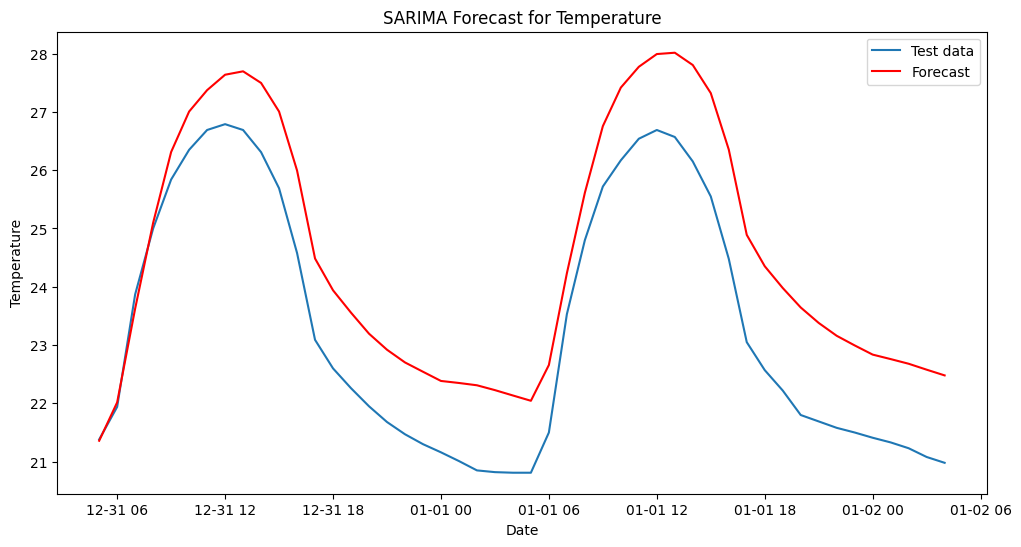

Root Mean Squared Error (RMSE): 1.3028667536868803
training now:  3


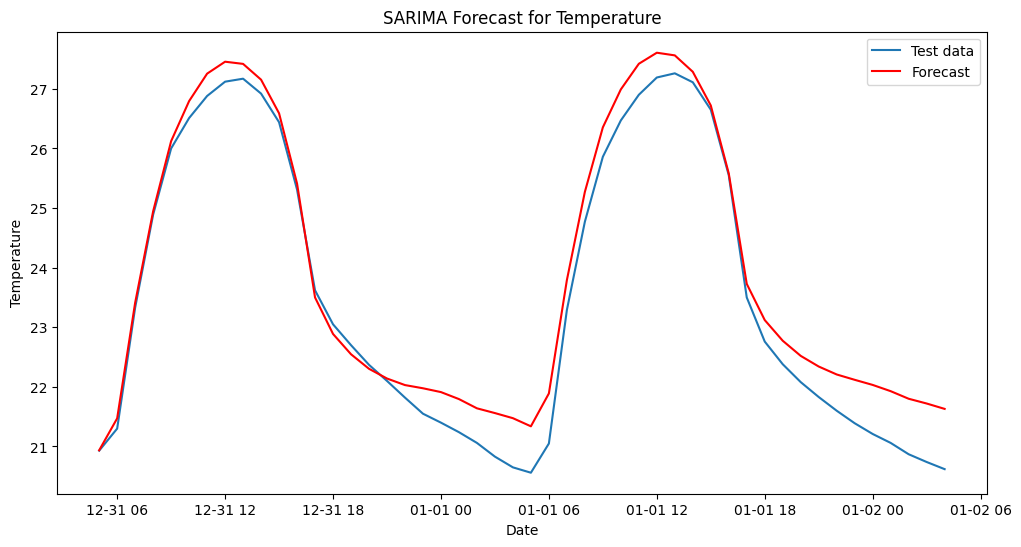

Root Mean Squared Error (RMSE): 0.49643298358726423
training now:  4


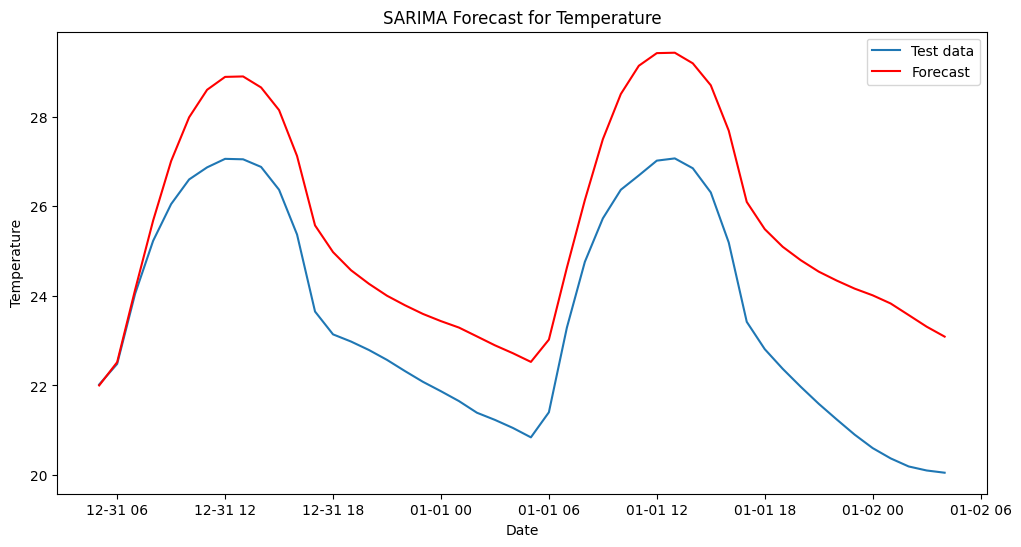

Root Mean Squared Error (RMSE): 2.136776758056388
training now:  5


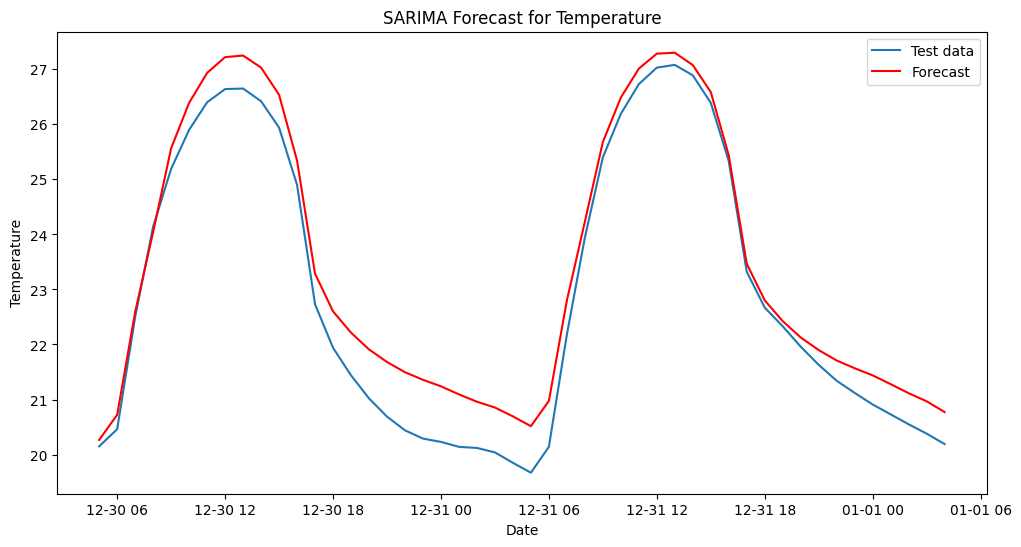

Root Mean Squared Error (RMSE): 0.5803003431521265
training now:  6


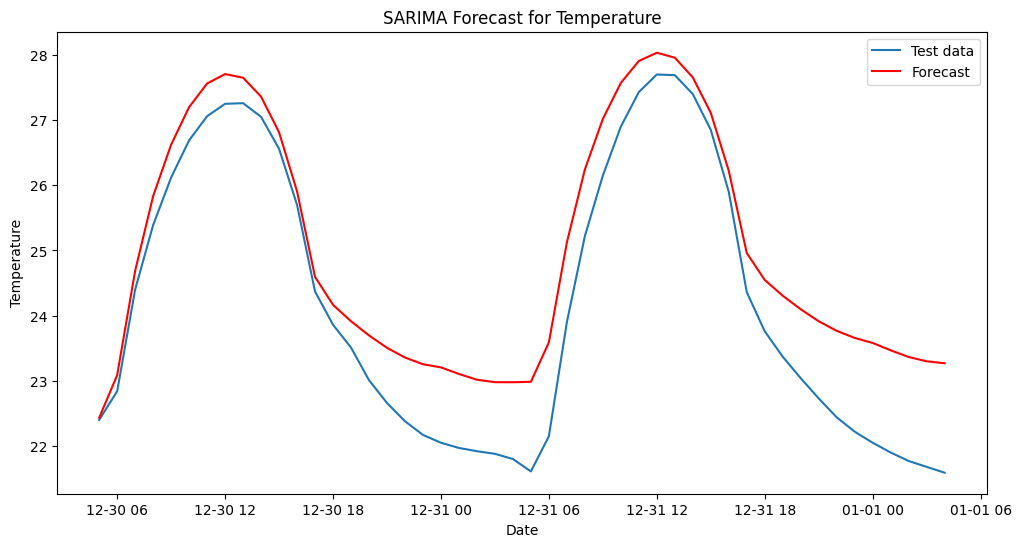

Root Mean Squared Error (RMSE): 0.9251174174584647
training now:  7


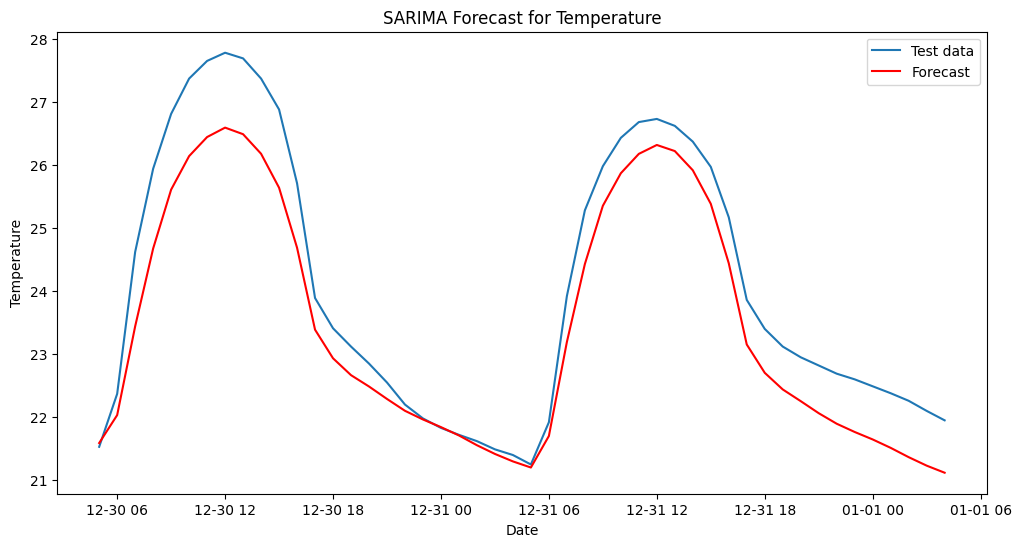

Root Mean Squared Error (RMSE): 0.7432492078602969
training now:  8


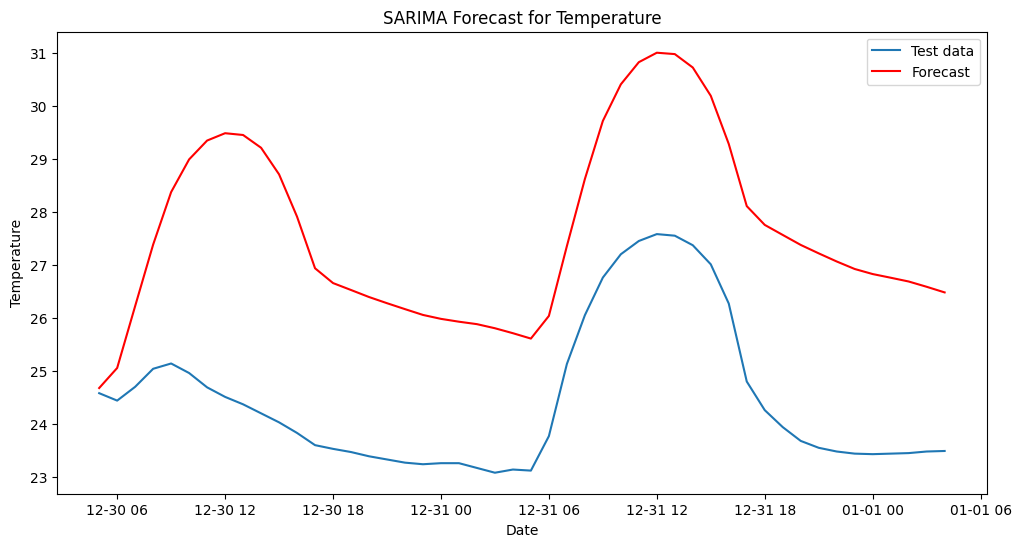

Root Mean Squared Error (RMSE): 3.284476351376321
training now:  9


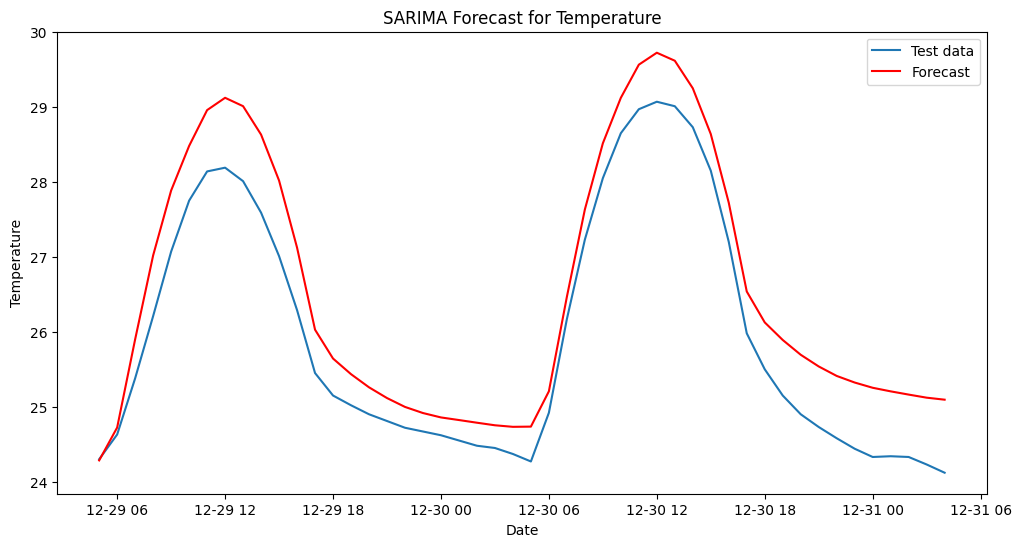

Root Mean Squared Error (RMSE): 0.6453803340708418
training now:  10


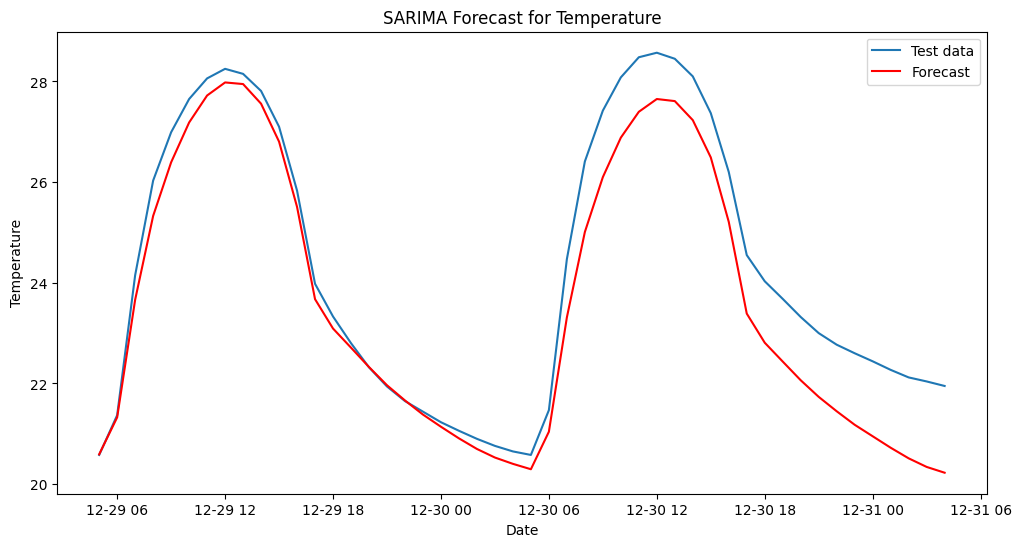

Root Mean Squared Error (RMSE): 0.8956707952399607
training now:  11


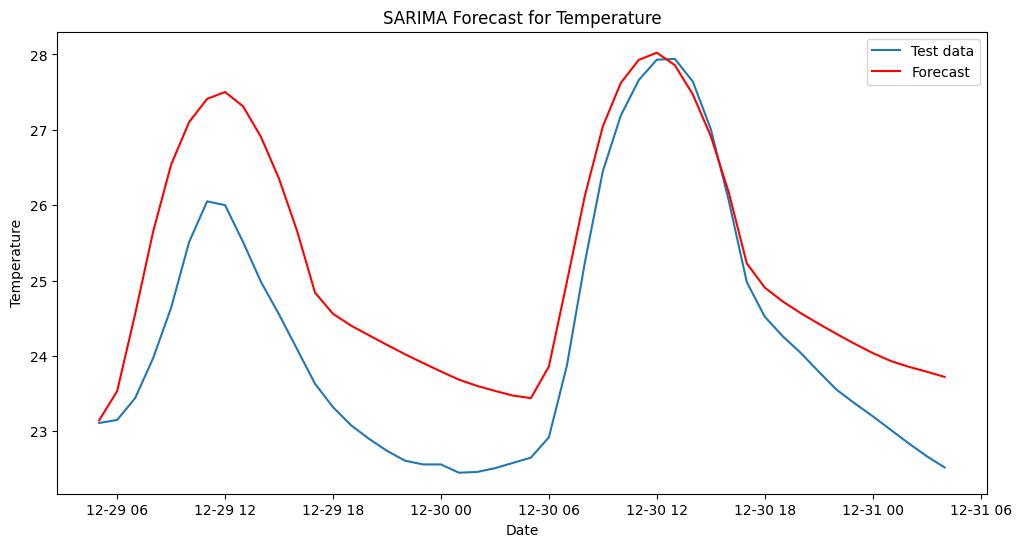

Root Mean Squared Error (RMSE): 1.093965390860917
training now:  12


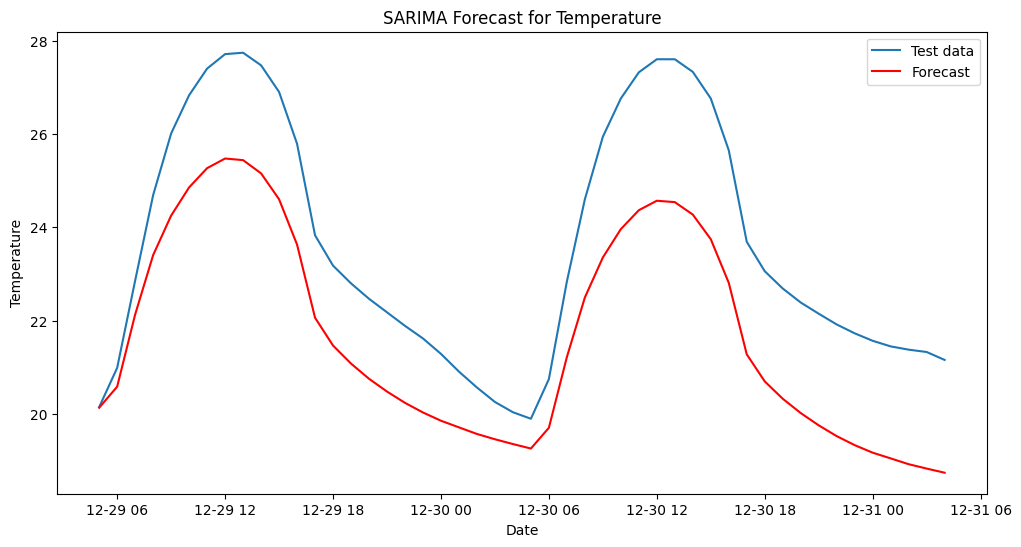

Root Mean Squared Error (RMSE): 2.0976897380650037
training now:  13


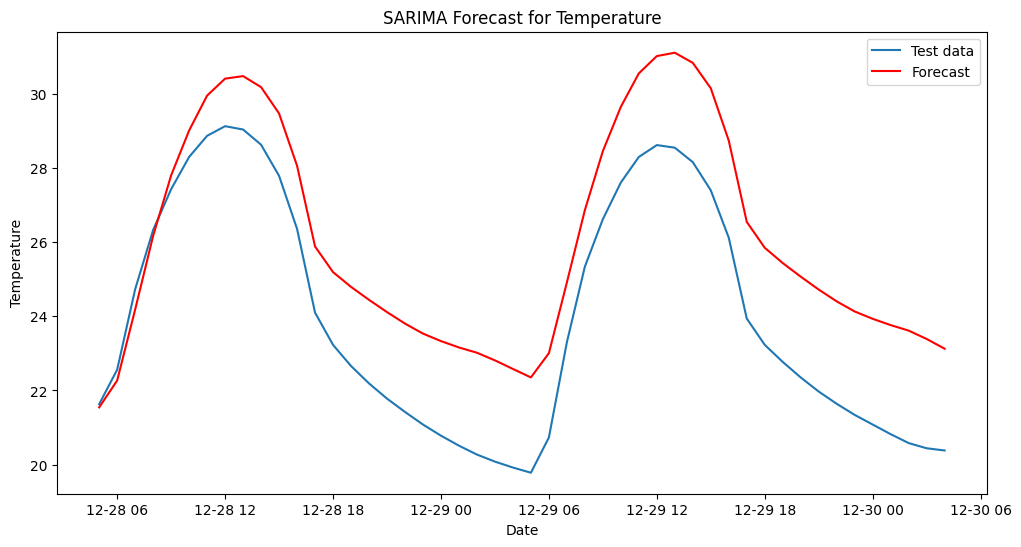

Root Mean Squared Error (RMSE): 2.2372043304304663
training now:  14


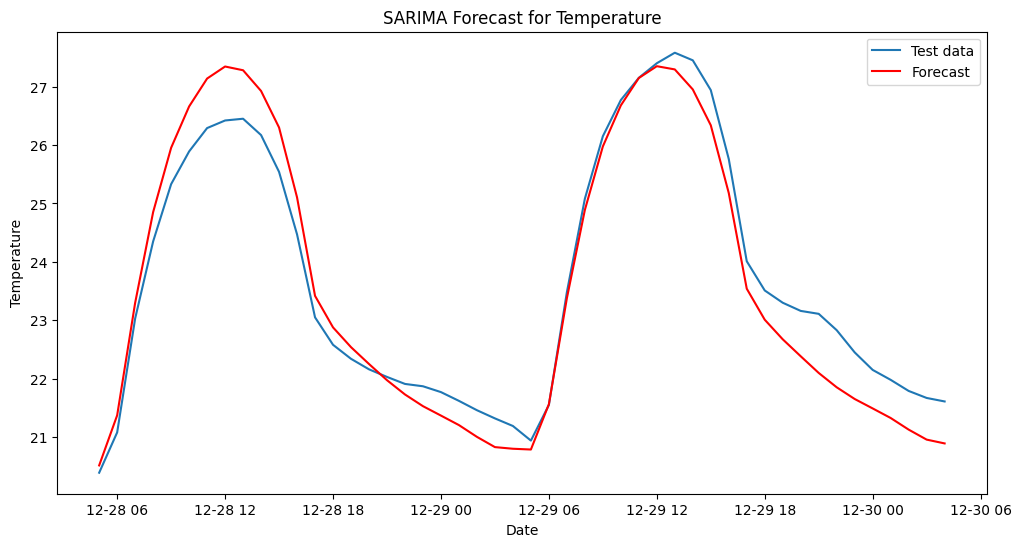

Root Mean Squared Error (RMSE): 0.5424821867657709
training now:  15


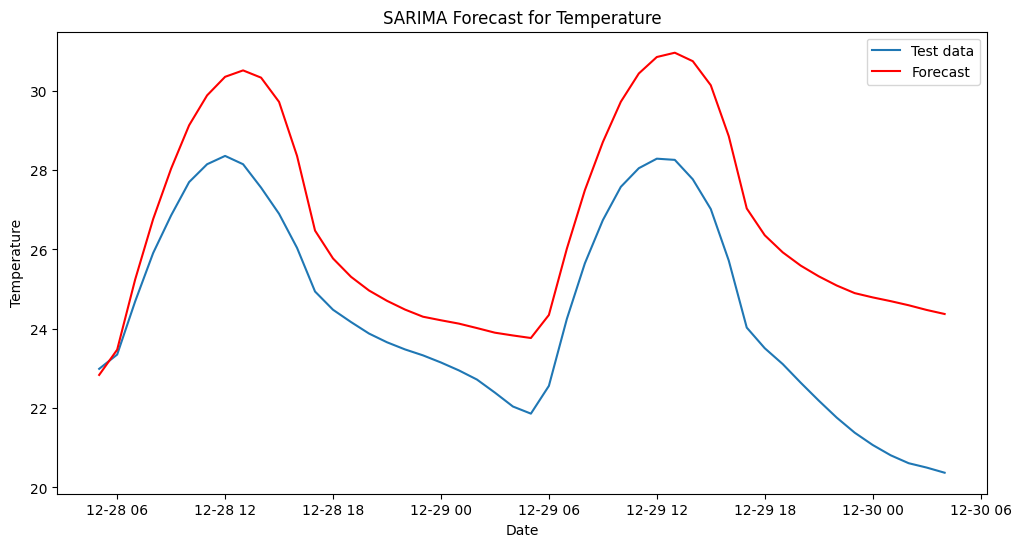

Root Mean Squared Error (RMSE): 2.376467552780782
training now:  16


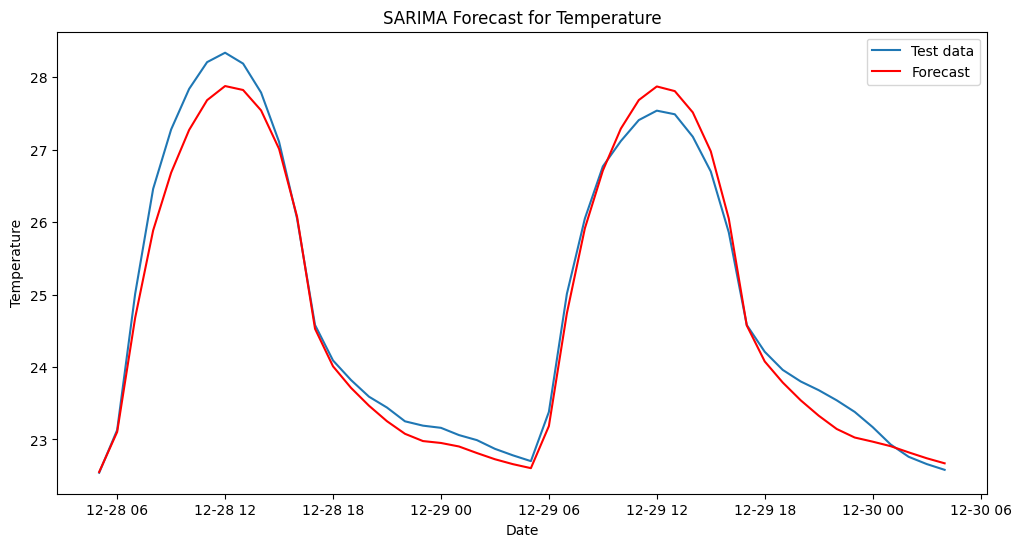

Root Mean Squared Error (RMSE): 0.26460617990264673
training now:  17


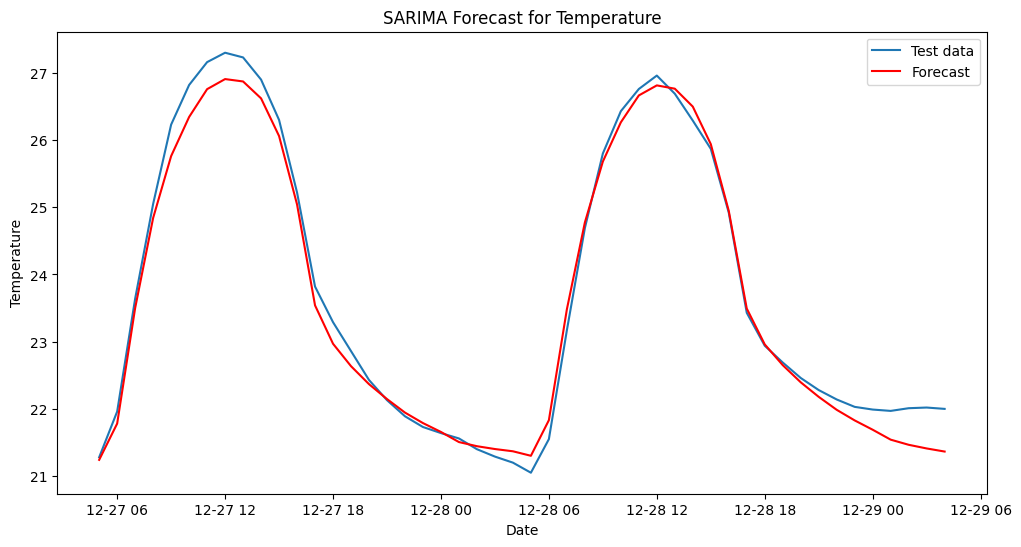

Root Mean Squared Error (RMSE): 0.2599550921425015
training now:  18


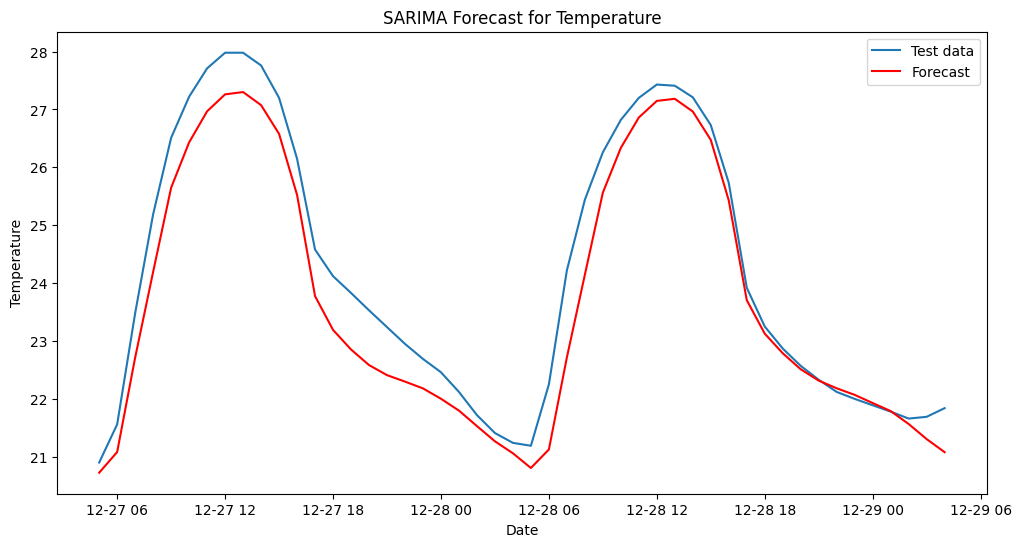

Root Mean Squared Error (RMSE): 0.6201248576162154
training now:  19


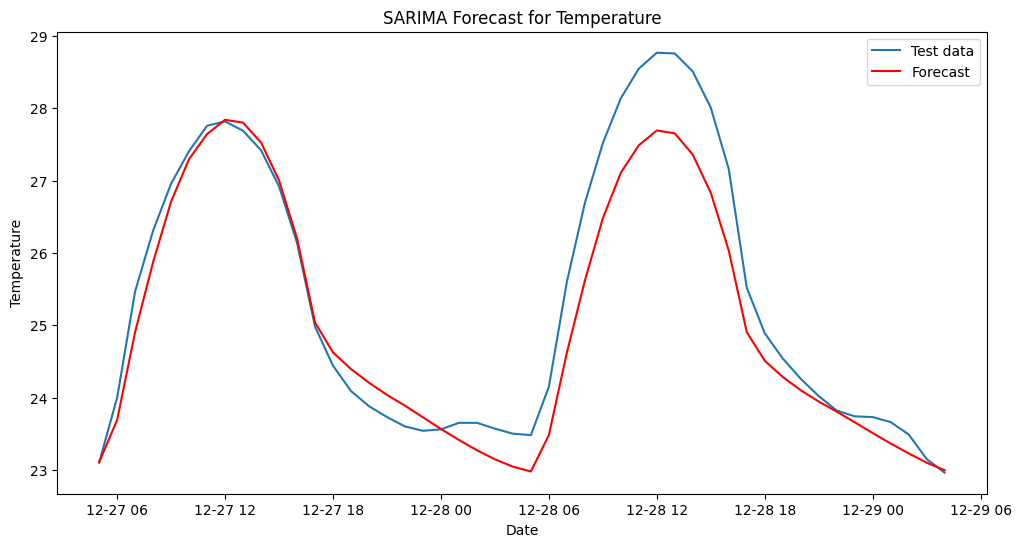

Root Mean Squared Error (RMSE): 0.5594883445448718
training now:  20


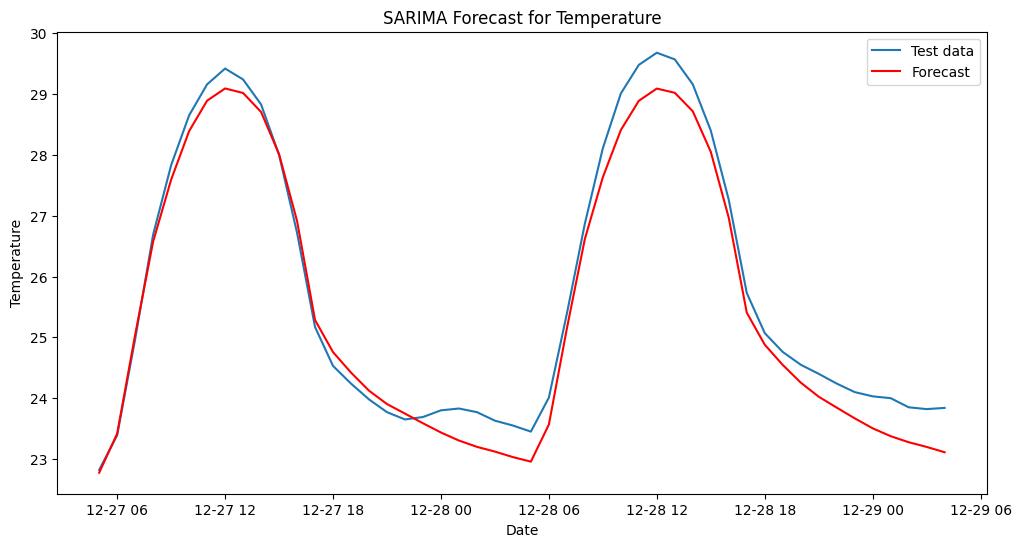

Root Mean Squared Error (RMSE): 0.38380512802097105


In [31]:
for i in range(2, 21):
    #check2=train_data[table[i-2]:table[i-1]]
    #test2=train_data[table[i-1]:table[i-1]+48] #2 days = 48 hours
    # Splitting data into train and test sets
    train_data = data[table[i-2]:table[i-1]]  # 1 year data
    test_data = data[table[i-1]:table[i-1]+48]   # Use the last 48 hours for testing
    print("training now: ", i)
    #training
    chennai_result=chennai_result.extend(train_data["TEMP"])
    #forecasting
    forecast2 = chennai_result.get_forecast(steps=48)
    # Plot the predicted values along with the actual values
    plt.figure(figsize=(12, 6))
    plt.plot(test_data.index, test_data["TEMP"], label='Test data')
    plt.plot(forecast2.predicted_mean, label='Forecast', color='red')
    plt.title('SARIMA Forecast for Temperature')
    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.legend()
    plt.show()
    #RMSE
    rmse = np.sqrt(mean_squared_error(test_data["TEMP"], forecast2.predicted_mean))
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    # to store RMSE for every year
    rmse_record[i] = rmse

In [32]:
rmse_record

{1: 1.0435281520809399,
 2: 1.3028667536868803,
 3: 0.49643298358726423,
 4: 2.136776758056388,
 5: 0.5803003431521265,
 6: 0.9251174174584647,
 7: 0.7432492078602969,
 8: 3.284476351376321,
 9: 0.6453803340708418,
 10: 0.8956707952399607,
 11: 1.093965390860917,
 12: 2.0976897380650037,
 13: 2.2372043304304663,
 14: 0.5424821867657709,
 15: 2.376467552780782,
 16: 0.26460617990264673,
 17: 0.2599550921425015,
 18: 0.6201248576162154,
 19: 0.5594883445448718,
 20: 0.38380512802097105}

In [33]:
forecast2.predicted_mean

2023-12-27 05:00:00    22.774148
2023-12-27 06:00:00    23.416911
2023-12-27 07:00:00    25.042032
2023-12-27 08:00:00    26.574950
2023-12-27 09:00:00    27.592675
2023-12-27 10:00:00    28.391163
2023-12-27 11:00:00    28.891671
2023-12-27 12:00:00    29.092565
2023-12-27 13:00:00    29.018002
2023-12-27 14:00:00    28.705791
2023-12-27 15:00:00    28.011529
2023-12-27 16:00:00    26.914074
2023-12-27 17:00:00    25.284801
2023-12-27 18:00:00    24.757056
2023-12-27 19:00:00    24.420520
2023-12-27 20:00:00    24.123476
2023-12-27 21:00:00    23.903137
2023-12-27 22:00:00    23.746137
2023-12-27 23:00:00    23.587432
2023-12-28 00:00:00    23.435375
2023-12-28 01:00:00    23.303416
2023-12-28 02:00:00    23.199567
2023-12-28 03:00:00    23.121658
2023-12-28 04:00:00    23.030976
2023-12-28 05:00:00    22.956326
2023-12-28 06:00:00    23.567123
2023-12-28 07:00:00    25.145721
2023-12-28 08:00:00    26.617858
2023-12-28 09:00:00    27.633325
2023-12-28 10:00:00    28.408811
2023-12-28

In [34]:
train_data=data[175200:]

In [35]:
chennai_result=chennai_result.extend(train_data["TEMP"])
forecast2 = chennai_result.get_forecast(steps=48)


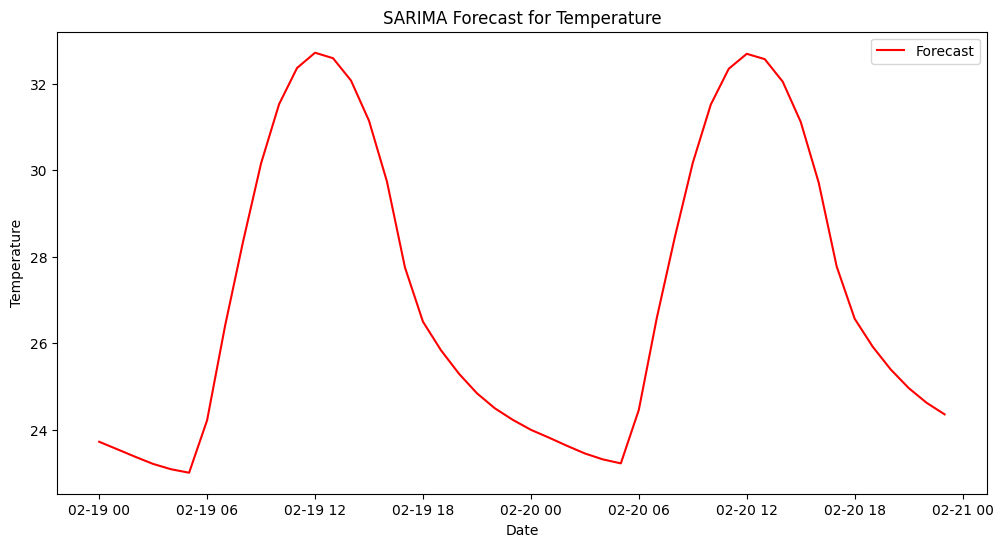

In [36]:
# Plot the predicted values along with the actual values
plt.figure(figsize=(12, 6))
#plt.plot(test_data.index, test_data["TEMP"], label='Test data')
plt.plot(forecast2.predicted_mean, label='Forecast', color='red')
plt.title('SARIMA Forecast for Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [37]:
#saving pickle file of model
with open("/kaggle/working/chennai_model.pkl", 'wb') as f:
    pickle.dump(chennai_result, f)

In [38]:
forecast2.predicted_mean

2024-02-19 00:00:00    23.720245
2024-02-19 01:00:00    23.547956
2024-02-19 02:00:00    23.373510
2024-02-19 03:00:00    23.207582
2024-02-19 04:00:00    23.084374
2024-02-19 05:00:00    23.004370
2024-02-19 06:00:00    24.218076
2024-02-19 07:00:00    26.404232
2024-02-19 08:00:00    28.350893
2024-02-19 09:00:00    30.158409
2024-02-19 10:00:00    31.525379
2024-02-19 11:00:00    32.364068
2024-02-19 12:00:00    32.717033
2024-02-19 13:00:00    32.590370
2024-02-19 14:00:00    32.073433
2024-02-19 15:00:00    31.143658
2024-02-19 16:00:00    29.735024
2024-02-19 17:00:00    27.750204
2024-02-19 18:00:00    26.497019
2024-02-19 19:00:00    25.837450
2024-02-19 20:00:00    25.294483
2024-02-19 21:00:00    24.841741
2024-02-19 22:00:00    24.492842
2024-02-19 23:00:00    24.225852
2024-02-20 00:00:00    23.996604
2024-02-20 01:00:00    23.816606
2024-02-20 02:00:00    23.628272
2024-02-20 03:00:00    23.449771
2024-02-20 04:00:00    23.312826
2024-02-20 05:00:00    23.220543
2024-02-20